In [42]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import xgboost as xgb

In [43]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

7.62 ms ± 74.4 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


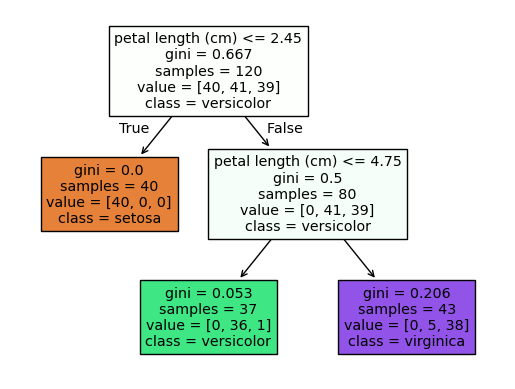

In [44]:
%%timeit -n 1000
clf_bounded = DecisionTreeClassifier(max_depth=2)
clf_bounded.fit(X_train, y_train)
plot_tree(
    clf_bounded,
    filled=True,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
);

13.2 ms ± 962 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


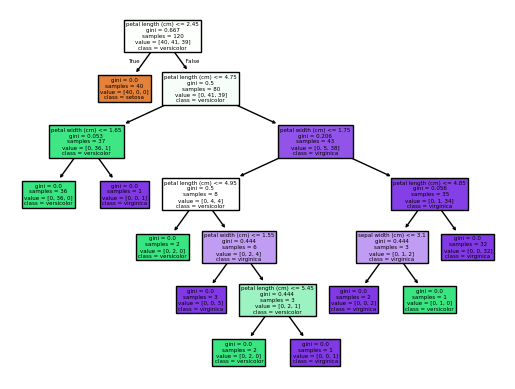

In [45]:
%%timeit -n 1000
clf_unbounded = DecisionTreeClassifier()
clf_unbounded.fit(X_train, y_train)
plot_tree(
    clf_unbounded,
    filled=True,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
);


In [46]:
print("Bounded tree accuracy:", clf_bounded.score(X_test, y_test))
print("Unbounded tree accuracy:", clf_unbounded.score(X_test, y_test))

Bounded tree accuracy: 0.9666666666666667
Unbounded tree accuracy: 1.0


In [47]:
%%timeit -n 1000
forest = RandomForestClassifier(n_estimators=5)
forest.fit(X_train, y_train)

4.1 ms ± 253 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [48]:
print("Random forest accuracy:", forest.score(X_test, y_test))

Random forest accuracy: 1.0


Text(0.5, 1.0, 'Feature Importances in Random Forest')

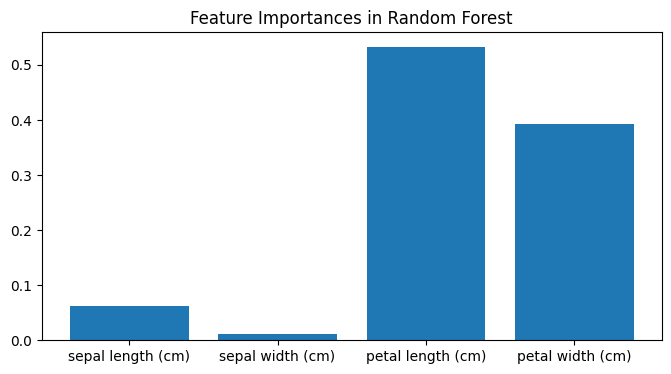

In [49]:
plt.figure(figsize=(8, 4))
plt.bar(iris.feature_names, forest.feature_importances_)
plt.title("Feature Importances in Random Forest")

Text(0, 0.5, 'Accuracy')

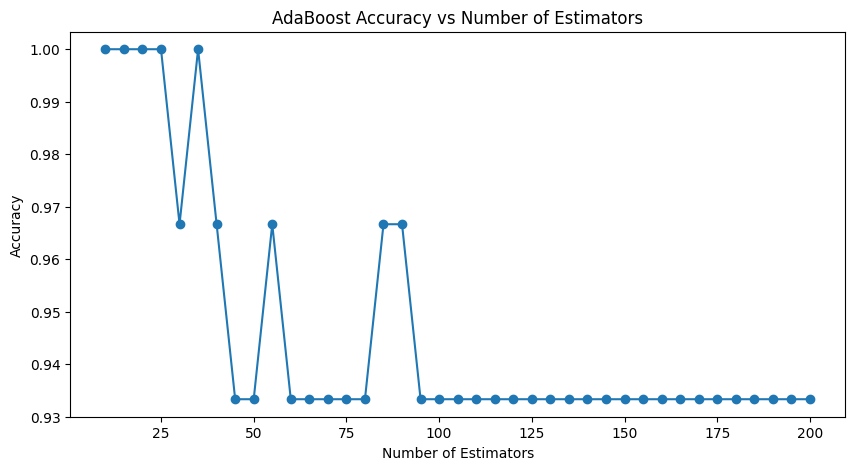

In [50]:
accuracy_list = []

est_count = range(10, 201, 5)

for est in est_count:
    ada = AdaBoostClassifier(n_estimators=est)
    ada.fit(X_train, y_train)
    accuracy_list.append(ada.score(X_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(est_count, accuracy_list, marker="o")
plt.title("AdaBoost Accuracy vs Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")

AdaBoost - Gradient Boosting with weighted answers based on correct classification


In [51]:
%%timeit -n 1000
grad_boost = GradientBoostingClassifier(n_estimators=5)
grad_boost.fit(X_train, y_train)

7.33 ms ± 733 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [52]:
print("Gradient Boosting accuracy:", grad_boost.score(X_test, y_test))

Gradient Boosting accuracy: 1.0


Text(0.5, 1.0, 'Feature Importances in Random Forest')

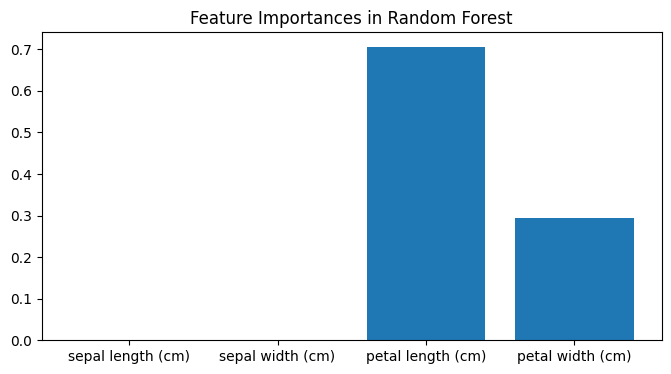

In [53]:
plt.figure(figsize=(8, 4))
plt.bar(iris.feature_names, grad_boost.feature_importances_)
plt.title("Feature Importances in Random Forest")

In [54]:
%%timeit -n 1000
xgb_clf = xgb.XGBClassifier(n_estimators=5, eval_metric="mlogloss")
xgb_clf.fit(X_train, y_train)

3.08 ms ± 84.1 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [55]:
print("XGBoost accuracy:", xgb_clf.score(X_test, y_test))

XGBoost accuracy: 1.0


Text(0.5, 1.0, 'Feature Importances in Gradient Boosting')

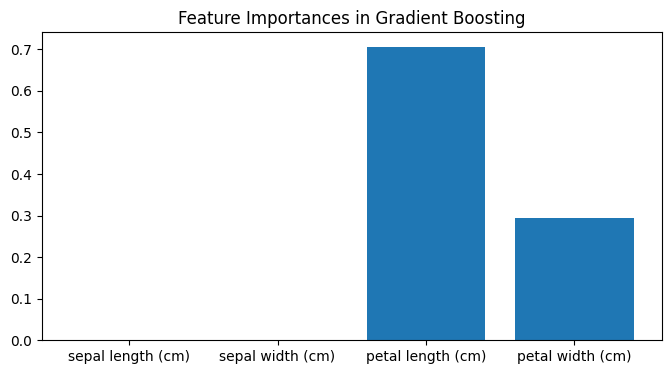

In [56]:
plt.figure(figsize=(8, 4))
plt.bar(iris.feature_names, grad_boost.feature_importances_)
plt.title("Feature Importances in Gradient Boosting")